Perceptron Simple


In [83]:
# Importamos librerías 
import numpy as np  # NumPy para arrays y operaciones numéricas
import matplotlib.pyplot as plt  # Matplotlib para graficar
import pandas as pd  # Pandas para manipulación de datos (opcional)
from sklearn.linear_model import Perceptron  # Modelo perceptrón de scikit-learn
from sklearn.datasets import load_iris, make_blobs  # Datasets de ejemplo; usamos make_blobs
from sklearn.model_selection import train_test_split  # Para dividir en train/test
from sklearn.metrics import accuracy_score, mean_squared_error, confusion_matrix, f1_score  # Métricas de evaluación

In [84]:
# Cargar los datos
X, y = make_blobs(n_samples=150, n_features=2, centers=2, cluster_std=2.05, random_state=2)

In [85]:
# Cargar los datos
# Generamos un dataset sintético con 150 muestras y 2 características (ajusta n_features si necesitas 10)
X, y = make_blobs(n_samples=150, n_features=2, centers=2, cluster_std=2.05, random_state=2)
# X es un array de forma (150, n_features) y y contiene etiquetas 0/1

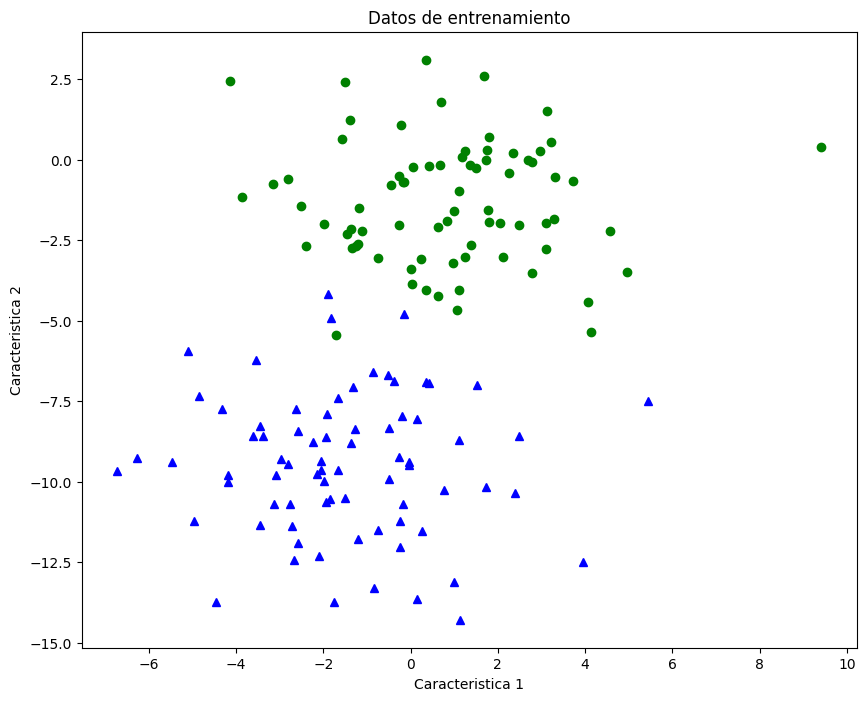

In [86]:
# Visualizar los datos (proyección en las dos primeras características)
# Cambiamos la etiqueta 0 por -1 para trabajar con el perceptrón (convención ±1)
y[y == 0] = -1  # reasignar etiquetas 0 -> -1
fig = plt.figure(figsize=(10,8))  # crear figura
# Dibujar puntos de clase -1 usando la primera y segunda característica
plt.plot(X[:, 0][y == -1], X[:, 1][y == -1], 'b^')  # triángulos azules
# Dibujar puntos de clase 1 usando la primera y segunda característica
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], 'go')  # círculos verdes
plt.xlabel("Caracteristica 1")  # etiqueta eje X
plt.ylabel("Caracteristica 2")  # etiqueta eje Y
plt.title('Datos de entrenamiento')  # título
plt.show()  # mostrar gráfica

**Conclusión (Datos de entrenamiento - proyección 2D):**
- La gráfica muestra la proyección de las muestras en las dos primeras características.
- Si las clases están separadas en esta proyección, es una indicación pero no una garantía de separabilidad en dimensiones mayores.
- Si hay solapamiento, el perceptrón puede fallar en esas zonas; considera usar más características o un modelo no lineal.

In [87]:
# Dimensiones de los datos
print('X.shape =', X.shape)  # muestra (n_muestras, n_características)

X.shape = (150, 2)


In [88]:
# Dividir los datos en entrenamiento y prueba
# test_size=0.3 reserva el 30% para evaluación
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Ahora X_train contiene ~70% de las muestras y X_test ~30%

In [89]:
# Crear y entrenar el Perceptrón
# max_iter controla el número máximo de iteraciones internas del algoritmo
modelo = Perceptron(max_iter=100, random_state=42)
# Ajustar el modelo a los datos de entrenamiento: calcula pesos (coef_) e intercept_
modelo.fit(X_train, y_train)

,penalty,None
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,100
,tol,0.001
,shuffle,True
,verbose,0
,eta0,1.0
,n_jobs,None
,random_state,42


In [90]:
# Hacer predicciones sobre el conjunto de prueba
# predict devuelve la etiqueta estimada para cada muestra en X_test
y_pred = modelo.predict(X_test)
print("Predicciones:", y_pred)  # imprime array de predicciones

Predicciones: [ 1  1 -1  1  1  1  1  1  1  1 -1  1  1 -1 -1 -1 -1  1 -1  1 -1  1  1  1
  1 -1 -1 -1  1  1 -1  1 -1 -1  1  1  1 -1 -1  1 -1  1  1  1 -1]


In [99]:
# Reporte de pesos y bias
w1, w2 = modelo.coef_[0]
bias = modelo.intercept_[0]

print(f"w1 = {w1}")
print(f"w2 = {w2}")
print(f"b = {bias}")


w1 = 4.492077653705298
w2 = 18.944995073582987
b = 94.0


In [92]:
# Crear el modelo para entrenamiento por épocas (incremental)
# warm_start=True permite mantener el estado entre llamadas a fit (no siempre necesario)
modelo = Perceptron(max_iter=100, random_state=42, warm_start=True)

costos = []  # lista para almacenar el error por época

# Entrenar y guardar costo en cada época usando partial_fit (actualización incremental)
for epoch in range(100):
    # partial_fit actualiza los pesos sin reiniciar el estado completo del estimador
    modelo.partial_fit(X_train, y_train, classes=np.unique(y_train))
    # Predecir con los pesos actuales sobre el conjunto de entrenamiento
    y_pred_train = modelo.predict(X_train)
    # Calcular MSE como proxy de error (aunque es más usada en regresión)
    mse = mean_squared_error(y_train, y_pred_train)
    costos.append(mse)  # almacenar el costo de la época

print(f"Costos por época (epoch): \n+ {costos[:10]}")  # mostrar los primeros 10 costos para inspección

Costos por época (epoch): 
+ [0.11428571428571428, 0.1523809523809524, 0.0380952380952381, 0.34285714285714286, 0.3047619047619048, 0.0380952380952381, 0.19047619047619047, 0.41904761904761906, 0.34285714285714286, 0.0761904761904762]


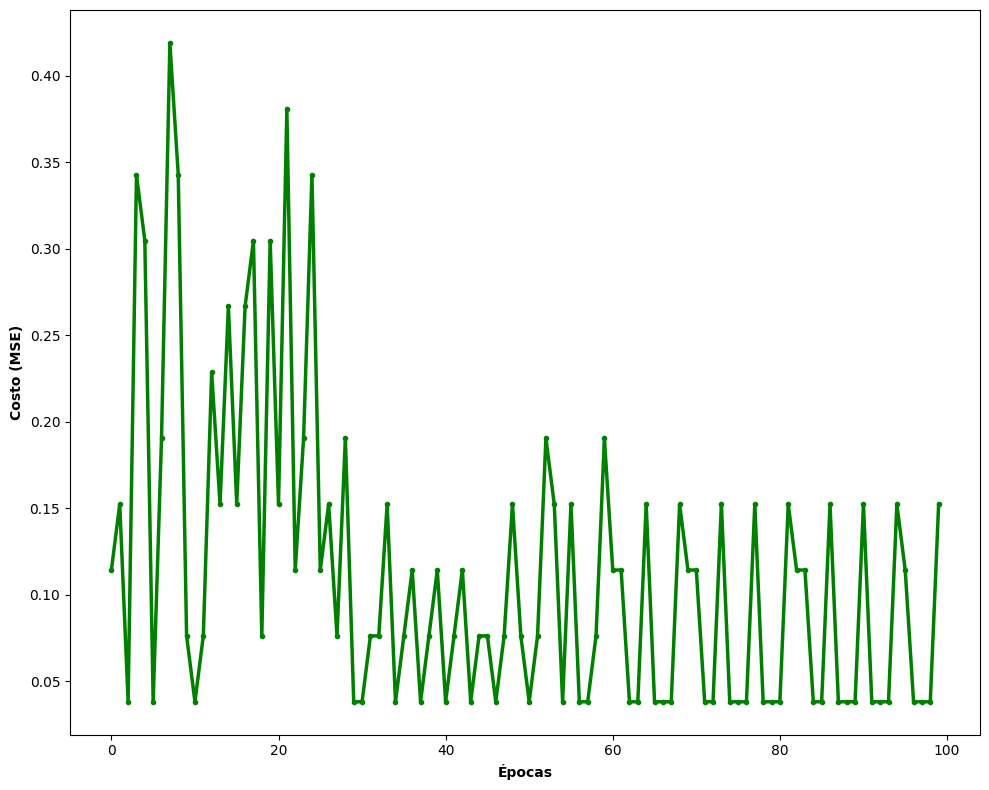

In [93]:
# Costos vs época (gráfica)
fig = plt.figure(figsize=(10, 8))  # crear figura
# Graficar MSE acumulado por época
plt.plot(range(len(costos)), costos, linewidth=2.5, color='green', marker='o', markersize=3)
plt.xlabel('Épocas', fontsize=10, fontweight='bold')
plt.ylabel('Costo (MSE)', fontsize=10, fontweight='bold')
plt.tight_layout()  # ajustar layout para que no se corten labels
plt.show()  # mostrar gráfica

**Conclusión (Costo vs Épocas):**
- Observa si la curva de costo desciende: indica que el modelo está reduciendo el error en entrenamiento.
- Si la curva se estabiliza, el modelo alcanzó convergencia; si sube o fluctúa mucho, revisar configuración de entrenamiento.

In [94]:
# Calcular accuracy final usando y_pred obtenido anteriormente
accuracy = accuracy_score(y_test, y_pred)  # proporción de predicciones correctas

print(f"Accuracy: {accuracy}")  # imprime valor decimal
print(f"Accuracy: {accuracy*100:.2f}%")  # imprime porcentaje con 2 decimales

Accuracy: 1.0
Accuracy: 100.00%


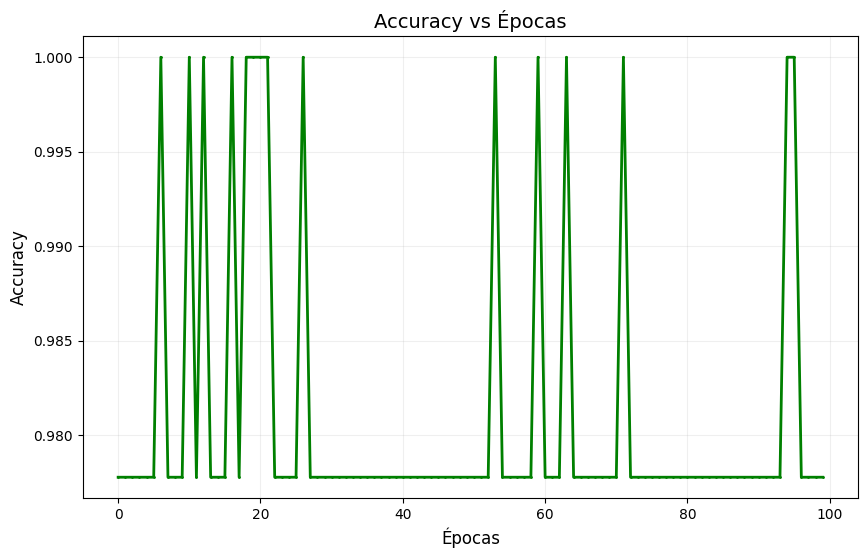

In [95]:
# Evaluar accuracy por épocas (ejemplo sencillo)
accuracies = []  # lista para almacenar accuracy por época

for epoch in range(100):
    # Nota: fit reinicia el entrenamiento; esto es solo un ejemplo de cómo registrar accuracy
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

# Graficar accuracy vs épocas
plt.figure(figsize=(10, 6))
plt.plot(accuracies, linewidth=2, color='green', marker='o', markersize=1)
plt.xlabel('Épocas', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Accuracy vs Épocas', fontsize=14)
plt.grid(True, alpha=0.2)
plt.show()

**Conclusión (Accuracy vs Épocas):**
- Una curva de accuracy creciente indica mejora en la capacidad predictiva en test (si no hay overfitting).
- Fluctuaciones fuertes pueden indicar inestabilidad o que el enfoque de reentrenamiento no es consistente.

In [96]:
# Métricas finales y matriz de confusión
y_pred = modelo.predict(X_test)  # predicción final

accuracy = accuracy_score(y_test, y_pred)  # exactitud
f1 = f1_score(y_test, y_pred)  # F1-score combina precisión y recall
cm = confusion_matrix(y_test, y_pred)  # matriz 2x2 [TN, FP; FN, TP]

# Extraer componentes de la matriz de confusión de forma segura
TN, FP, FN, TP = cm.ravel()

sensibilidad = TP / (TP + FN) if (TP + FN) != 0 else float('nan')  # recall
especificidad = TN / (TN + FP) if (TN + FP) != 0 else float('nan')

# Mostrar resultados
print("Accuracy:", accuracy)
print("F1-Score:", f1)
print("Matriz de Confusión:", cm)
print("Sensibilidad (Recall):", sensibilidad)
print("Especificidad:", especificidad)


Accuracy: 0.9777777777777777
F1-Score: 0.9818181818181818
Matriz de Confusión: [[17  1]
 [ 0 27]]
Sensibilidad (Recall): 1.0
Especificidad: 0.9444444444444444


In [97]:
# Ejemplo: predicción para un paciente con 2 características (altura, peso) - ajustar según modelo
import numpy as np  # ya importado arriba, se incluye aquí por claridad en la celda
# Si el modelo fue entrenado con 2 características, pasar un array de forma (1,2)
nuevo_paciente = np.array([[179, 50]])   # ejemplo: [altura_cm, peso_kg]

# Predecir (asegúrate de que la dimensión coincide con lo que espera el modelo)
prediccion = modelo.predict(nuevo_paciente)

print("Paciente nuevo:", nuevo_paciente)
print("Predicción del índice:", prediccion[0])

Paciente nuevo: [[179  50]]
Predicción del índice: 1


In [98]:
# Simular un paciente nuevo con características aleatorias (misma dimensionalidad que X)
paciente_nuevo = np.random.rand(1, X.shape[1])  # genera 1 muestra con n_features columnas

# Comprobar dimensiones antes de predecir
expected = modelo.coef_.shape[1]
if paciente_nuevo.shape[1] != expected:
    raise ValueError(f"El modelo espera {expected} características, pero paciente_nuevo tiene {paciente_nuevo.shape[1]}")

# Clasificación del paciente
prediccion = modelo.predict(paciente_nuevo)

print("Características del paciente nuevo:", paciente_nuevo)
print("Clasificación del paciente:", "Clase Positiva (enfermo)" if prediccion[0] == 1 else "Clase Negativa (sano)")


Características del paciente nuevo: [[0.34243814 0.62189854]]
Clasificación del paciente: Clase Positiva (enfermo)
